## Observations and Insights 

In [83]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data_df = pd.merge( mouse_metadata, study_results, on = "Mouse ID")

# Display the data table for preview
mouse_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [84]:
# Check new df for any null data and for column info
mouse_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [85]:
# Checking the number of mice.
mouse_data_df["Mouse ID"].nunique()

249

In [86]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = mouse_data_df[mouse_data_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [87]:
# getting rid of duplicates 
#mouse_data_clean_df = mouse_data_df[mouse_data_df['Mouse ID'] != 'g989']
mouse_data_clean_df = mouse_data_df.drop(mouse_data_df.index [[909, 911, 913, 915, 917]])

In [88]:
mouse_data_clean_df.shape

(1888, 8)

In [89]:
# run duplicate function to check for anymore duplicates from new data
mouse_data_clean_df[mouse_data_clean_df.duplicated(["Mouse ID", "Timepoint"])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [90]:
# Checking the number of mice in the clean DataFrame.
mouse_data_clean_df['Mouse ID'].nunique()

249

## Summary Statistics

In [91]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_drug_reg = mouse_data_clean_df.groupby(["Drug Regimen"]).agg(['mean', 'median', 'std', 'sem']).reset_index()


In [92]:
# Clean new df
summary_drug_reg = summary_drug_reg.loc[:, ['Drug Regimen', 'Tumor Volume (mm3)']]

In [93]:
summary_drug_reg.reset_index(drop = True)
summary_drug_reg

Drug Regimen Tumor Volume (mm3)                               
                             mean     median       std       sem
0    Capomulin          40.675741  41.557809  4.994774  0.329346
1     Ceftamin          52.591172  51.776157  6.268188  0.469821
2    Infubinol          52.884795  51.820584  6.567243  0.492236
3     Ketapril          55.235638  53.698743  8.279709  0.603860
4     Naftisol          54.331565  52.509285  8.134708  0.596466
5      Placebo          54.033581  52.288934  7.821003  0.581331
6     Propriva          52.393463  50.909965  6.568014  0.525862
7     Ramicane          40.216745  40.673236  4.846308  0.320955
8     Stelasyn          54.233149  52.431737  7.710419  0.573111
9    Zoniferol          53.236507  51.818479  6.966589  0.516398

## Bar and Pie Charts

In [100]:
# Create a new df for drug regimen and number of times used throughout the study
drug_reg_count = mouse_data_clean_df.groupby(["Drug Regimen"]).agg(['count']).reset_index()
drug_reg_count = drug_reg_count.loc[:, ["Drug Regimen", "Mouse ID"]]


In [101]:
drug_reg_count = drug_reg_count.rename(columns = {"Mouse ID": "Used_Throughout"})
drug_reg_count.columns = drug_reg_count.columns.droplevel(1)
drug_reg_count.head()

,Drug Regimen,Used_Throughout
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186


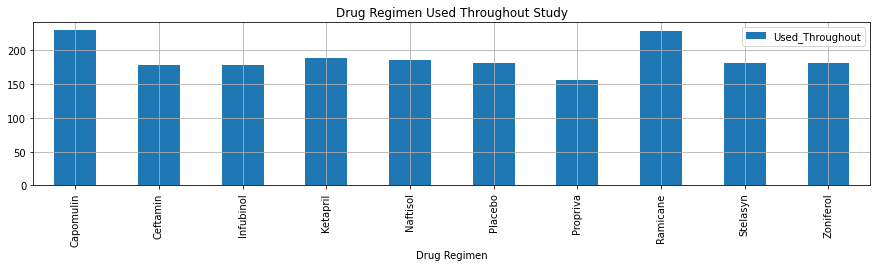

In [113]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_reg_count.plot(kind="bar", x="Drug Regimen", y="Used_Throughout", figsize=(15, 3), grid = True, title="Drug Regimen Used Throughout Study")

plt.show()

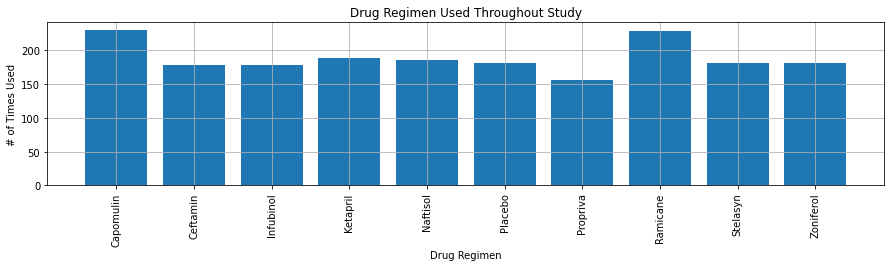

In [112]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.figure(figsize = (15, 3))
plt.bar(drug_reg_count['Drug Regimen'], drug_reg_count['Used_Throughout'])
plt.xticks(rotation = 90)
plt.title("Drug Regimen Used Throughout Study")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Times Used")
plt.grid()
plt.show()


In [118]:
# Generate a df to use in the creation of pie graphs
male_female_df = mouse_data_clean_df.groupby(["Sex"]).agg(['count']).reset_index()
male_female_df = male_female_df.loc[:, ["Sex", "Mouse ID"]]

,Sex,Mouse ID
,,count
0,Female,930
1,Male,958


In [120]:
male_female_df = male_female_df.rename(columns = {"Mouse ID": "Count"})
male_female_df.columns = male_female_df.columns.droplevel(1)
male_female_df.head()

,Sex,Count
0,Female,930
1,Male,958


In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
